In [1]:
"""
Convert coordinates for strokes so that is matching GNS format (or any arbitrary format)
NOTE: see data_exploration_tutorial_v2 for full list of preprocessing steps. here is
just about cooridante conversion.

Also does conversion from strokes to splines, (not fitting number of control points, but using hand
picked number)
"""

'\nConvert coordinates for strokes so that is matching GNS format (or any arbitrary format)\nNOTE: see data_exploration_tutorial_v2 for full list of preprocessing steps. here is\njust about cooridante conversion.\n\nAlso does conversion from strokes to splines, (not fitting number of control points, but using hand\npicked number)\n'

In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:
animal = "Red" # choose Red or Pancho

In [4]:
import pandas as pd
import pickle 
from pythonlib.dataset.dataset import Dataset

if animal == "Red":
    path_list = [
        "/data2/analyses/database/Red-lines5-formodeling-210329_005719",
        "/data2/analyses/database/Red-arc2-formodeling-210329_005550",
        "/data2/analyses/database/Red-shapes3-formodeling-210329_005200",
        "/data2/analyses/database/Red-figures89-formodeling-210329_005443"
    ]
elif animal=="Pancho":
    path_list = [
        "/data2/analyses/database/Pancho-lines5-formodeling-210329_014835",
        "/data2/analyses/database/Pancho-arc2-formodeling-210329_014648",
        "/data2/analyses/database/Pancho-shapes3-formodeling-210329_002448",
        "/data2/analyses/database/Pancho-figures89-formodeling-210329_000418"
    ]
    
D = Dataset(path_list)


----------------
Currently loading: /data2/analyses/database/Red-lines5-formodeling-210329_005719
Loaded metadat:
{'sketchpad_edges': array([[-327.2, -327.2],
       [ 327.2,  429.6]])}
----------------
Currently loading: /data2/analyses/database/Red-arc2-formodeling-210329_005550
Loaded metadat:
{'sketchpad_edges': array([[-327.2, -327.2],
       [ 327.2,  429.6]])}
----------------
Currently loading: /data2/analyses/database/Red-shapes3-formodeling-210329_005200
Loaded metadat:
{'sketchpad_edges': array([[-311.84, -224.8 ],
       [ 311.84,  429.6 ]])}
----------------
Currently loading: /data2/analyses/database/Red-figures89-formodeling-210329_005443
Loaded metadat:
{'sketchpad_edges': array([[-311.84, -224.8 ],
       [ 311.84,  429.6 ]])}
----
Resetting index
=== CLEANING UP self.Dat ===== 
ORIGINAL: online abort values
assigned_to_wrong_chunk         522
too_far_from_ink                371
failed_to_assignstroke           44
hotkey_abort                     13
failed_to_assign_st

In [5]:
# recenter tasks (so they are all similar spatial coords)
D.recenter(method="each_beh_center")

# interpolate beh (to reduce number of pts)
if False:
    # no need to run this if just comverting to images
    D.interpolateStrokes()

# subsample traisl in a stratified manner to amke sure good represnetaiton
# of all variety of tasks.
if True:
    # False: leave false to keep entire datsaet. Can then prune which images you use post-hoc.
    # True; Al;ternatively, make this True to prune here, which might be useful if you will then
    # treat the images as the entire datset.
    D.subsampleTrials()
    

# Recompute task edges (i..e, bounding box)
D.recomputeSketchpadEdges()

RANDOM TASKS, before subsampling to 250
arc            3544
polygon        1053
linePlusL       879
3line           585
linePlusLv2     579
1line           167
mixture1         23
2linePlusL       14
LplusL           14
Name: task_stagecategory, dtype: int64
for this task, expt, epoch, task, this many trials exist: ('mixture1', 'figures8', 1, 3)
for this task, expt, epoch, task, this many trials exist: ('polygon', 'shapes3', 1, 1053)
for this task, expt, epoch, task, this many trials exist: ('mixture1', 'figures9', 1, 20)
for this task, expt, epoch, task, this many trials exist: ('2linePlusL', 'lines5', 1, 14)
for this task, expt, epoch, task, this many trials exist: ('LplusL', 'lines5', 1, 14)
for this task, expt, epoch, task, this many trials exist: ('linePlusLv2', 'lines5', 1, 161)
for this task, expt, epoch, task, this many trials exist: ('linePlusL', 'lines5', 1, 449)
for this task, expt, epoch, task, this many trials exist: ('3line', 'lines5', 2, 585)
for this task, expt, epoch, 

for this task, expt, epoch, task, this many trials exist: ('mixture2_16-savedset-13-62857', 'figures9', 1, 108)
for this task, expt, epoch, task, this many trials exist: ('mixture2_1-savedset-13-62857', 'figures9', 1, 107)
for this task, expt, epoch, task, this many trials exist: ('mixture2_1-savedset-25-69494', 'figures9', 1, 19)
for this task, expt, epoch, task, this many trials exist: ('3linePlusL_7-savedset-1-58421', 'figures9', 1, 2)
for this task, expt, epoch, task, this many trials exist: ('3linePlusL_51-savedset-1-96703', 'figures9', 1, 10)
for this task, expt, epoch, task, this many trials exist: ('linePlusLv2_18-savedset-1-76513', 'figures9', 1, 10)
for this task, expt, epoch, task, this many trials exist: ('mixture1_182-savedset-3-69421', 'figures9', 1, 10)
for this task, expt, epoch, task, this many trials exist: ('lineLCircle2_151-savedset-1-73232', 'figures9', 1, 2)
for this task, expt, epoch, task, this many trials exist: ('lineLCircle_52-savedset-1-96123', 'figures9', 1

for this task, expt, epoch, task, this many trials exist: ('mixture1_110-savedset-6-84108', 'figures9', 1, 13)
for this task, expt, epoch, task, this many trials exist: ('mixture2_3-savedset-14-62857', 'figures9', 1, 17)
for this task, expt, epoch, task, this many trials exist: ('mixture2_5-savedset-23-73571', 'figures9', 1, 20)
for this task, expt, epoch, task, this many trials exist: ('lineLCircle_152-savedset-1-04886', 'figures9', 1, 2)
for this task, expt, epoch, task, this many trials exist: ('mixture2_3-savedset-26-62857', 'figures9', 1, 6)
for this task, expt, epoch, task, this many trials exist: ('mixture2_9-savedset-22-73571', 'figures9', 1, 249)
for this task, expt, epoch, task, this many trials exist: ('mixture2_9-savedset-13-62857', 'figures9', 1, 114)
for this task, expt, epoch, task, this many trials exist: ('3linePlusL_67-savedset-1-50125', 'figures9', 1, 9)
for this task, expt, epoch, task, this many trials exist: ('lineLCircle_52-savedset-1-07253', 'figures9', 1, 7)
fo

for this task, expt, epoch, task, this many trials exist: ('mixture2_4-savedset-15-62857', 'figures9', 1, 7)
for this task, expt, epoch, task, this many trials exist: ('tri_sq_prog_1b_10-savedset-1-31339', 'figures9', 1, 6)
for this task, expt, epoch, task, this many trials exist: ('LplusL_10-savedset-1-10402', 'figures9', 1, 9)
for this task, expt, epoch, task, this many trials exist: ('LplusL_45-savedset-1-84800', 'figures9', 1, 2)
for this task, expt, epoch, task, this many trials exist: ('mixture2_11-savedset-13-62857', 'figures9', 1, 111)
for this task, expt, epoch, task, this many trials exist: ('mixture1_32-savedset-6-58485', 'figures9', 1, 15)
for this task, expt, epoch, task, this many trials exist: ('2linePlusL_7-savedset-1-89342', 'figures9', 1, 7)
for this task, expt, epoch, task, this many trials exist: ('mixture1_123-savedset-6-75288', 'figures9', 1, 14)
for this task, expt, epoch, task, this many trials exist: ('mixture2_8-savedset-24-59237', 'figures9', 1, 12)
for this 

for this task, expt, epoch, task, this many trials exist: ('linePlusLv2_11-savedset-1-92952', 'lines5', 1, 32)
for this task, expt, epoch, task, this many trials exist: ('2linePlusL_145-savedset-1-80375', 'lines5', 1, 3)
for this task, expt, epoch, task, this many trials exist: ('linePlusLv2_6-savedset-3-37671', 'lines5', 1, 2)
for this task, expt, epoch, task, this many trials exist: ('linePlusLv2_97-savedset-1-33160', 'lines5', 1, 32)
for this task, expt, epoch, task, this many trials exist: ('linePlusL_6-resynth-Pancho_200903_1-1-55-73840', 'lines5', 1, 16)
for this task, expt, epoch, task, this many trials exist: ('3linePlusL_10-savedset-1-03560', 'lines5', 1, 3)
for this task, expt, epoch, task, this many trials exist: ('linePlusLv2_26-savedset-1-38151', 'lines5', 1, 34)
for this task, expt, epoch, task, this many trials exist: ('linePlusLv2_44-savedset-1-86237', 'lines5', 1, 36)
for this task, expt, epoch, task, this many trials exist: ('LplusL_2-savedset-1-79094', 'lines5', 1, 2

for this task, expt, epoch, task, this many trials exist: ('LplusL_45-savedset-1-94758', 'lines5', 2, 3)
for this task, expt, epoch, task, this many trials exist: ('linePlusLv2_198-savedset-3-24589', 'lines5', 2, 1)
for this task, expt, epoch, task, this many trials exist: ('linePlusLv2_67-savedset-3-12467', 'lines5', 2, 1)
for this task, expt, epoch, task, this many trials exist: ('linePlusLv2_1-savedset-3-58235', 'lines5', 2, 2)
for this task, expt, epoch, task, this many trials exist: ('linePlusLv2_69-savedset-3-80897', 'lines5', 2, 1)
for this task, expt, epoch, task, this many trials exist: ('linePlusLv2_61-savedset-1-94457', 'lines5', 2, 71)
for this task, expt, epoch, task, this many trials exist: ('3linePlusL_51-savedset-1-96703', 'lines5', 2, 3)
for this task, expt, epoch, task, this many trials exist: ('linePlusLv2_18-savedset-1-76513', 'lines5', 2, 56)
for this task, expt, epoch, task, this many trials exist: ('3linePlusL_5-savedset-1-55002', 'lines5', 2, 3)
for this task, e

for this task, expt, epoch, task, this many trials exist: ('linePlusLv2_25-savedset-1-78640', 'lines5', 2, 30)
for this task, expt, epoch, task, this many trials exist: ('2linePlusL_9-savedset-1-31420', 'lines5', 2, 3)
for this task, expt, epoch, task, this many trials exist: ('linePlusLv2_178-savedset-3-86256', 'lines5', 2, 3)
for this task, expt, epoch, task, this many trials exist: ('3linePlusL_147-savedset-1-08749', 'lines5', 2, 3)
for this task, expt, epoch, task, this many trials exist: ('linePlusLv2_197-savedset-3-12363', 'lines5', 2, 1)
for this task, expt, epoch, task, this many trials exist: ('linePlusLv2_9-savedset-3-11640', 'arc2', 1, 2)
for this task, expt, epoch, task, this many trials exist: ('lineLCircle2_151-savedset-1-81088', 'arc2', 1, 3)
for this task, expt, epoch, task, this many trials exist: ('linePlusLv2_28-savedset-3-53735', 'arc2', 1, 3)
for this task, expt, epoch, task, this many trials exist: ('lineLCircle_120-savedset-1-66794', 'arc2', 1, 4)
for this task, 

### Convert strokes to new coord system

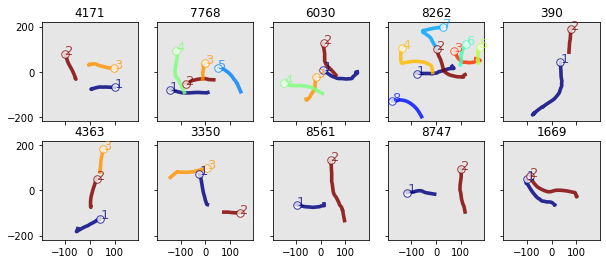

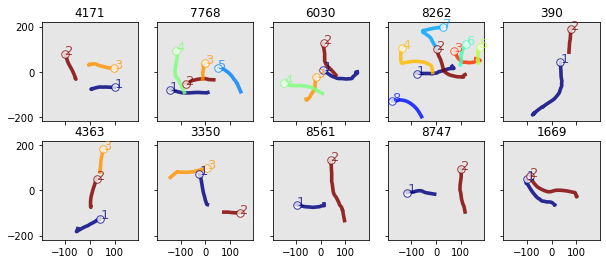

In [6]:
# Plot random trials before coord conversion
D.plotMultTrials(10)

In [7]:
# Do conversion.
edges_out = D._edges["bpl"].T
D.convertCoord(edges_out)

Computed these for edges_in:
[[-234.384045    234.384045  ]
 [-268.68917882  268.68917882]]
DONE converting coords


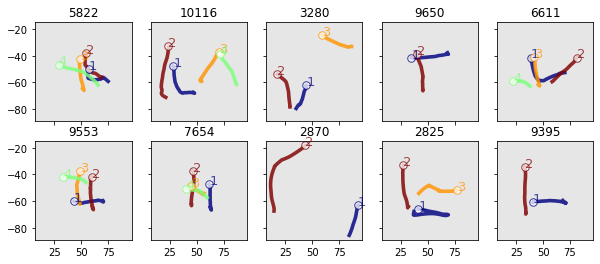

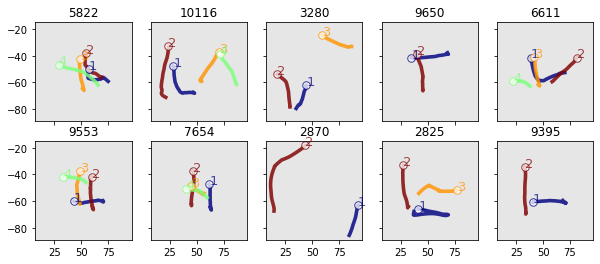

In [8]:
# Plot after coord conversion
D.plotMultTrials(10)

### Convert to splines
NOTE: not yet implemented fitting of num comtrol points. To make this mod, is easy. Update these lines:

https://github.com/lucast4/pythonlib/blob/1cd3e25585a30578996627328b8158450247459c/pythonlib/drawmodel/splines.py#L43-L62        

In [9]:
D.strokesToSplines(add_fake_timesteps=False)

converting to splines, might take a minute...


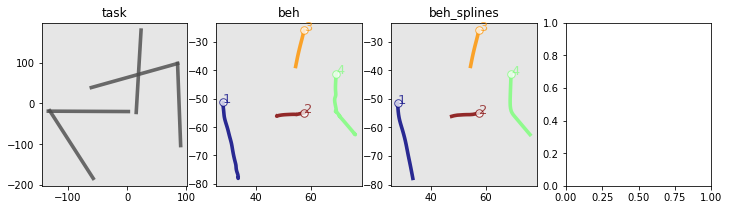

In [18]:
# Plot original beh and splines for a comparison
D.plotSingleTrial(idx= 4205, things_to_plot=['task', 'beh', 'beh_splines']);